In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/ACER/Downloads/house_price1.csv")
data.head()

,Title,Area,Address,Bedroom,WC,Floor,links,Description,Price(Mil)
0,"Bán Biệt thự sân vườn Quận 12, 130m2, 3 Tầng 7...",130.0,Hồ Chí Minh,7.0,6.0,3.0,https://batdongsan.vn/ban-biet-thu-san-vuon-qu...,"+ Kết cấu: 7 PN, 6 WC, ban công, phòng thờ, Ph...",9200.0
1,2.9 Tỷ Diện Tích 65/80m2 Nhà Kiệt Lê Văn Hưu N...,65.0,Đà Nẵng,4.0,2.0,2.0,https://batdongsan.vn/29-ty-dien-tich-6580m2-n...,2.9 Tỷ Diện Tích 65/80m2 Nhà Kiệt Lê Văn Hưu N...,2900.0
2,Bán Nhà Kim Ngưu – Phân Lô Ô Tô – Nở Hậu – Mặt...,90.0,Hà Nội,5.0,4.0,5.0,https://batdongsan.vn/ban-nha-kim-nguu-phan-lo...,“KHÔNG MUA NHÀ NÀY THÌ MUA NHÀ NÀO”- BÁN NHÀ T...,14000.0
3,Quận 3 - Lê Văn Sỹ - 5 TẦNG BTCT - Hẻm xe hơi ...,NaN,Hồ Chí Minh,4.0,2.0,5.0,https://batdongsan.vn/quan-3-le-van-sy-5-tang-...,+ Kế bên Quận 1 - Quận 3 -Khu dân cư sầm uất +...,NaN
4,"Bán Gấp Nhà đẹp Điện Biên Phủ, Phường 22, Bình...",38.0,Hồ Chí Minh,3.0,3.0,3.0,https://batdongsan.vn/ban-gap-nha-dep-dien-bie...,"Bán Gấp Nhà đẹp Điện Biên Phủ, Phường 22, Bình...",4400.0


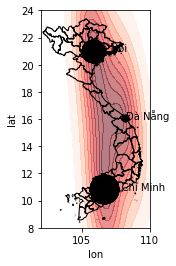

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the shapefile of Vietnam provinces
gdf = gpd.read_file('https://raw.githubusercontent.com/non-ceterisparibus/Vietnam-development-map/main/geodata/vietnam_state.geojson')

# Load the coordinates of some cities in Vietnam
df = pd.DataFrame({
    "city": ["Hà Nội", "Hồ Chí Minh", "Đà Nẵng"],
    "lat": [21.0245, 10.8230, 16.0678],
    "lon": [105.8412, 106.6297, 108.2208],
    "size": [20,20,20]
})

# Plot the heatmap with seaborn
sns.kdeplot(x=df["lon"], y=df["lat"], fill=True, cmap="Reds", alpha=0.5)

# Plot the shapefile with geopandas
gdf.plot(ax=plt.gca(), facecolor="none", edgecolor="black")
# Add labels for the cities
for i in range(len(data)):
    for j in range(len(df)):
        if data['Address'][i]==df['city'][j]:
            df['size'][j]+=2
            plt.scatter(x=df["lon"][j], y=df["lat"][j],s=df['size'][j], color="black")
for i in range(len(df)):
    plt.text(x=df["lon"][i]+0.05, y=df["lat"][i]-0.05, s=df["city"][i])

# Adjust the axes limits and aspect ratio
plt.xlim(102, 110)
plt.ylim(8, 24)
plt.gca().set_aspect("equal")

# Show the plot
plt.show()

<AxesSubplot:>

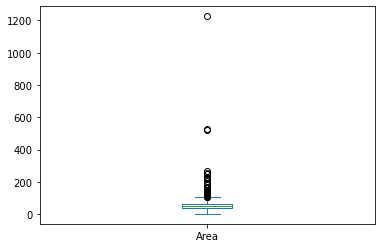

In [4]:
data['Area'].plot(kind='box')

<AxesSubplot:>

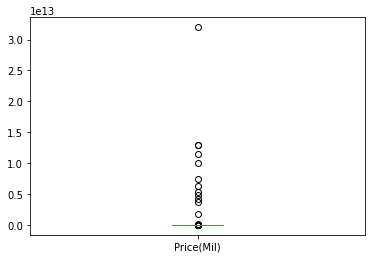

In [5]:
data['Price(Mil)'].plot(kind='box')

In [6]:
max_thresold=data['Area'].quantile(0.9)
min_thresold=data['Area'].quantile(0.1)
data=data[(data['Area']>min_thresold) & (data['Area']<max_thresold)]
max_thresold,min_thresold

(100.0, 30.0)

In [7]:
max_thresold=data['Price(Mil)'].quantile(0.9)
min_thresold=data['Price(Mil)'].quantile(0.1)
data=data[(data['Price(Mil)']>min_thresold) & (data['Price(Mil)']<max_thresold)]
max_thresold,min_thresold

(13650.000000000005, 3250.0)

<AxesSubplot:>

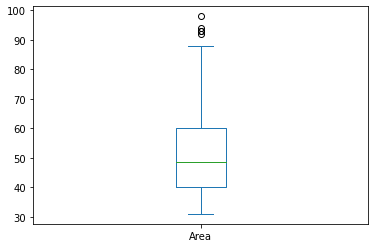

In [8]:
data['Area'].plot(kind='box')

<AxesSubplot:>

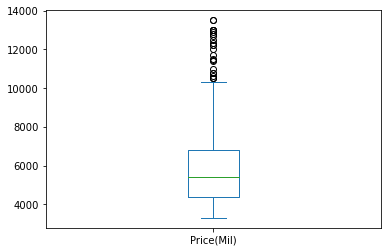

In [9]:
data['Price(Mil)'].plot(kind='box')

In [10]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 4 to 668
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        364 non-null    object 
 1   Area         364 non-null    float64
 2   Address      364 non-null    object 
 3   Bedroom      364 non-null    float64
 4   WC           364 non-null    float64
 5   Floor        364 non-null    float64
 6   links        364 non-null    object 
 7   Description  364 non-null    object 
 8   Price(Mil)   364 non-null    float64
dtypes: float64(5), object(4)
memory usage: 28.4+ KB


In [11]:
data.describe()

,Area,Bedroom,WC,Floor,Price(Mil)
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,51.324176,3.576923,2.909341,3.173077,5998.186813
std,14.043591,1.116920,1.246492,1.368774,2264.822498
min,31.000000,1.000000,1.000000,2.000000,3300.000000
25%,40.000000,3.000000,2.000000,2.000000,4400.000000
50%,48.500000,4.000000,2.000000,2.000000,5400.000000
75%,60.000000,4.000000,4.000000,4.000000,6812.500000
max,98.000000,10.000000,9.000000,8.000000,13500.000000


In [12]:
data['Address'].value_counts()

Hồ Chí Minh    208
Hà Nội         153
Đà Nẵng          3
Name: Address, dtype: int64

In [13]:
data['Address'].value_counts(normalize=True)

Hồ Chí Minh    0.571429
Hà Nội         0.420330
Đà Nẵng        0.008242
Name: Address, dtype: float64

<AxesSubplot:xlabel='Address', ylabel='count'>

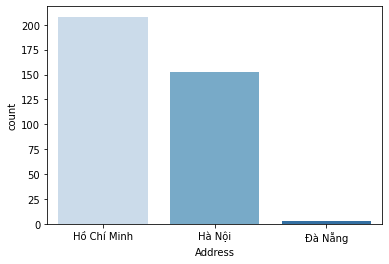

In [14]:
sns.countplot(data=data,x='Address', palette='Blues')

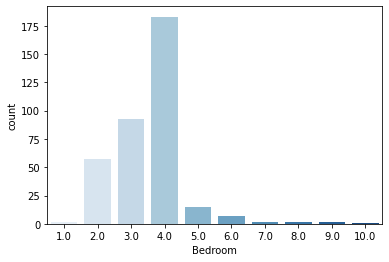

In [15]:
sns.countplot(data=data, x='Bedroom', palette='Blues');

<AxesSubplot:xlabel='WC', ylabel='count'>

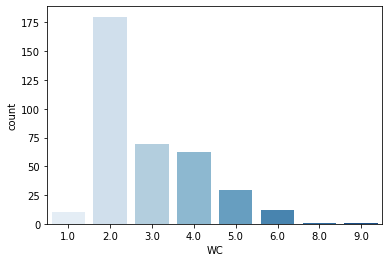

In [16]:
sns.countplot(data=data, x='WC', palette='Blues')

<AxesSubplot:xlabel='Floor', ylabel='count'>

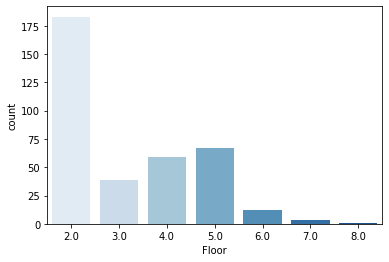

In [17]:
sns.countplot(data=data, x='Floor', palette='Blues')

<AxesSubplot:xlabel='Area', ylabel='Count'>

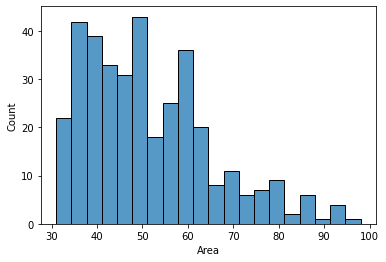

In [18]:
sns.histplot(data=data,x='Area',bins=20,palette='Blues')

In [19]:
data.groupby(['Address']).max()['Price(Mil)'].sort_values(ascending=False)

Address
Hồ Chí Minh    13500.0
Hà Nội         13000.0
Đà Nẵng         9200.0
Name: Price(Mil), dtype: float64

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [21]:
encoder=OneHotEncoder(handle_unknown='ignore')
encoded_data=encoder.fit_transform(data['Address'].values.reshape(-1,1)).toarray()
encoded_data=pd.DataFrame(encoded_data,columns=['Đà Nẵng','Hà Nội','Hồ Chí Minh'])
encoded_data=encoded_data.astype('category')

In [22]:
data=data.drop(['Address','Title','links','Description'],axis=1)

In [23]:
scaler = StandardScaler()
data=scaler.fit_transform(data)

In [24]:
data=pd.DataFrame(data,columns=['Area','Bedroom','WC','Floor','Price(Mil)'])
data=data.join(encoded_data,how='inner')

In [25]:
data.dtypes

Area            float64
Bedroom         float64
WC              float64
Floor           float64
Price(Mil)      float64
Đà Nẵng        category
Hà Nội         category
Hồ Chí Minh    category
dtype: object

In [26]:
y=data['Price(Mil)']
X=data.drop(['Price(Mil)'],axis=1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train.shape,X_test.shape

((291, 7), (73, 7))

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    print("Regression Report:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2):", r2)

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred_linear=reg.predict(X_test)
regression_report(y_test, y_pred_linear)

Regression Report:
Mean Absolute Error (MAE): 0.6080362410743895
Mean Squared Error (MSE): 0.6175787013065003
Root Mean Squared Error (RMSE): 0.7858617571217601
R-squared (R^2): 0.30602873331925573


In [31]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(random_state=1000)
lasso_reg.fit(X_train,y_train)
y_pred_lasso=lasso_reg.predict(X_test)
regression_report(y_test, y_pred_lasso)

Regression Report:
Mean Absolute Error (MAE): 0.7207098718625332
Mean Squared Error (MSE): 0.8925176010119711
Root Mean Squared Error (RMSE): 0.9447314967820069
R-squared (R^2): -0.002919253528048227


In [32]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(random_state=1000)
ridge_reg.fit(X_train,y_train)
y_pred_ridge=ridge_reg.predict(X_test)
regression_report(y_test, y_pred_ridge)

Regression Report:
Mean Absolute Error (MAE): 0.6094743464140219
Mean Squared Error (MSE): 0.6174542167573458
Root Mean Squared Error (RMSE): 0.7857825505553975
R-squared (R^2): 0.30616861622013325


In [33]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=2023)
decision_tree.fit(X_train, y_train)
y_pred_tree=decision_tree.predict(X_test)
regression_report(y_test, y_pred_tree)

Regression Report:
Mean Absolute Error (MAE): 0.6337894372423961
Mean Squared Error (MSE): 0.9213026431705629
Root Mean Squared Error (RMSE): 0.9598451141567388
R-squared (R^2): -0.035264915912448735


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=2023)
rf.fit(X_train, y_train)
y_pred_forest=rf.predict(X_test)
regression_report(y_test, y_pred_forest)

Regression Report:
Mean Absolute Error (MAE): 0.4980329148445404
Mean Squared Error (MSE): 0.4436356433240018
Root Mean Squared Error (RMSE): 0.6660597896015055
R-squared (R^2): 0.5014880068062931


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2023)
gbm.fit(X_train, y_train)
y_pred_gbm=gbm.predict(X_test)
regression_report(y_test, y_pred_gbm)

Regression Report:
Mean Absolute Error (MAE): 0.4986994954392796
Mean Squared Error (MSE): 0.4365963390589637
Root Mean Squared Error (RMSE): 0.6607543711992859
R-squared (R^2): 0.5093980511245721


In [36]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm=svm.predict(X_test)
regression_report(y_test, y_pred_svm)

Regression Report:
Mean Absolute Error (MAE): 0.6263789641586651
Mean Squared Error (MSE): 0.64082608378885
Root Mean Squared Error (RMSE): 0.8005161358703833
R-squared (R^2): 0.27990572189713536


In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
kernel = RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X_train, y_train)
y_pred_gpr=gpr.predict(X_test)
regression_report(y_test, y_pred_gpr)

Regression Report:
Mean Absolute Error (MAE): 0.5962883325788143
Mean Squared Error (MSE): 0.6859277217313642
Root Mean Squared Error (RMSE): 0.8282075354229543
R-squared (R^2): 0.229225151556661


In [38]:
from sklearn.neighbors import KNeighborsRegressor
k = 3  
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
regression_report(y_test, y_pred_knn)

Regression Report:
Mean Absolute Error (MAE): 0.6014968130528856
Mean Squared Error (MSE): 0.6317719801217659
Root Mean Squared Error (RMSE): 0.7948408520715112
R-squared (R^2): 0.29007979003972617


In [39]:
from sklearn.model_selection import KFold, cross_val_score


seed = 1000
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = KFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis=1)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    # sort by accuracy
    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)
    
    return baseline_results

models = [
    SVR(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    GaussianProcessRegressor(kernel=kernel),
    KNeighborsRegressor(n_neighbors=k)
]

baseline_results = generate_baseline_results(models, X, y, metrics='r2', cv=5, plot_results=False)
print(baseline_results)


                               Mean  Standard Deviation
model_name                                             
RandomForestRegressor      0.475543            0.079632
GradientBoostingRegressor  0.470249            0.124996
SVR                        0.429827            0.143369
Ridge                      0.421433            0.130600
LinearRegression           0.421256            0.130872
KNeighborsRegressor        0.328162            0.153998
GaussianProcessRegressor   0.177553            0.165411
DecisionTreeRegressor      0.139571            0.073246
Lasso                     -0.012441            0.013899


In [40]:
cat_features=np.stack([X_train['Đà Nẵng'], X_train['Hà Nội'],
       X_train['Hồ Chí Minh']],1)
cat_features

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1

In [41]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 

In [42]:
cont_features=['Area','Bedroom','WC','Floor']
cont_values=np.stack([X_train[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[ 0.6186, -1.4138, -0.7305, -0.8582],
        [-0.6649, -0.5172,  0.8762,  1.3366],
        [ 0.3334, -0.5172,  0.0728, -0.8582],
        ...,
        [-0.8075,  0.3793,  0.8762, -0.8582],
        [-0.0944,  0.3793, -0.7305,  0.6050],
        [ 1.3317,  0.3793,  2.4829,  1.3366]])

In [43]:
cont_values.dtype

torch.float32

In [44]:
y=torch.tensor(y_train,dtype=torch.float)
y

tensor([-8.3927e-01, -5.6072e-01,  8.9230e-02,  2.2187e-01, -4.4134e-01,
        -7.5084e-01, -5.2977e-01, -8.3927e-01, -2.4238e-01,  1.2388e+00,
        -1.0603e+00, -8.7627e-02,  6.6402e-01,  1.3344e-01, -9.2770e-01,
        -8.7627e-02,  1.2460e-01, -1.0973e-01, -1.7606e-01,  1.4157e+00,
         3.9873e-01, -6.4031e-01,  6.6402e-01, -5.7398e-01,  1.3272e+00,
         6.6402e-01,  4.5016e-02,  8.0169e-04, -1.3184e-01, -1.1046e+00,
         4.5016e-02, -5.9609e-01, -8.8349e-01,  1.1504e+00, -4.4134e-01,
        -2.2027e-01,  5.2253e-01, -1.0736e+00, -1.1046e+00,  3.0516e+00,
        -2.2027e-01, -8.3927e-01, -4.4134e-01, -9.2770e-01, -1.3184e-01,
        -9.7634e-01, -7.9948e-01,  8.0169e-04, -3.5291e-01,  7.0823e-01,
        -3.9713e-01,  3.9873e-01,  2.8747e+00, -1.1930e+00, -2.2027e-01,
        -1.7606e-01, -1.0161e+00, -4.4134e-01, -5.2977e-01, -7.1547e-01,
         1.2830e+00,  1.1062e+00, -2.2027e-01, -7.5084e-01, -7.2874e-01,
        -8.3927e-01, -1.0603e+00,  8.0169e-04,  9.7

In [45]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([291, 3]), torch.Size([291, 4]), torch.Size([291]))

In [46]:
cat_dims=[len(X_train[col].unique()) for col in ['Đà Nẵng','Hà Nội','Hồ Chí Minh']]
cat_dims

[2, 2, 2]

In [47]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [48]:
embedding_dim

[(2, 1), (2, 1), (2, 1)]

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(2, 1)
  (1): Embedding(2, 1)
  (2): Embedding(2, 1)
)

In [50]:
cat_features

tensor([[0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 

In [51]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0]])

In [52]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [53]:
embedding_val

[tensor([[0.8115],
         [0.1308],
         [0.8115],
         [0.1308],
         [0.1308],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.1308],
         [0.1308],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.1308],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.8115],
         [0.8115],
         [0.1308],
         [0.

In [54]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.8115,  0.1809,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.8115, -2.0121,  0.2943],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.8115,  0.1809,  0.1582],
        [ 0.1308, -2.0121,  0.1582],
 

In [55]:
droput=nn.Dropout(.4)

In [56]:
final_embed=droput(z)
final_embed

tensor([[ 1.3524,  0.3016,  0.0000],
        [ 0.2181, -3.3534,  0.2636],
        [ 0.0000,  0.3016,  0.2636],
        [ 0.0000, -3.3534,  0.2636],
        [ 0.2181, -3.3534,  0.2636],
        [ 0.0000, -3.3534,  0.0000],
        [ 1.3524,  0.0000,  0.2636],
        [ 1.3524,  0.3016,  0.2636],
        [ 0.2181, -3.3534,  0.2636],
        [ 1.3524,  0.3016,  0.2636],
        [ 0.0000, -0.0000,  0.0000],
        [ 0.0000,  0.3016,  0.2636],
        [ 0.0000, -3.3534,  0.2636],
        [ 0.0000, -0.0000,  0.2636],
        [ 0.0000, -0.0000,  0.0000],
        [ 1.3524,  0.0000,  0.2636],
        [ 0.0000,  0.3016,  0.2636],
        [ 0.2181, -0.0000,  0.2636],
        [ 0.0000,  0.0000,  0.2636],
        [ 0.0000, -3.3534,  0.4905],
        [ 0.0000, -3.3534,  0.0000],
        [ 0.2181, -3.3534,  0.0000],
        [ 1.3524,  0.3016,  0.2636],
        [ 0.0000,  0.3016,  0.2636],
        [ 0.0000,  0.0000,  0.2636],
        [ 1.3524,  0.0000,  0.2636],
        [ 0.2181, -3.3534,  0.2636],
 

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [58]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [59]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(2, 1)
    (2): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [60]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [61]:
batch_size=291
test_size=73
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [62]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(218, 73, 218, 73, 218, 73)

In [63]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 1.1782737970352173
Epoch number: 11 and the loss : 1.0204471349716187
Epoch number: 21 and the loss : 0.9966863989830017
Epoch number: 31 and the loss : 0.9950404763221741
Epoch number: 41 and the loss : 0.993633508682251
Epoch number: 51 and the loss : 0.993095874786377
Epoch number: 61 and the loss : 0.992784857749939
Epoch number: 71 and the loss : 0.9927220940589905
Epoch number: 81 and the loss : 0.9926854968070984
Epoch number: 91 and the loss : 0.9926657676696777
Epoch number: 101 and the loss : 0.9926635026931763
Epoch number: 111 and the loss : 0.992661714553833
Epoch number: 121 and the loss : 0.9926612377166748
Epoch number: 131 and the loss : 0.9926610589027405
Epoch number: 141 and the loss : 0.9926609992980957
Epoch number: 151 and the loss : 0.9926609992980957
Epoch number: 161 and the loss : 0.9926609992980957
Epoch number: 171 and the loss : 0.9926609992980957
Epoch number: 181 and the loss : 0.9926609992980957
Epoch number: 191 and the l

Epoch number: 1591 and the loss : 0.9926608800888062
Epoch number: 1601 and the loss : 0.9926608800888062
Epoch number: 1611 and the loss : 0.9926608800888062
Epoch number: 1621 and the loss : 0.9926608800888062
Epoch number: 1631 and the loss : 0.9926608800888062
Epoch number: 1641 and the loss : 0.9926608800888062
Epoch number: 1651 and the loss : 0.9926608800888062
Epoch number: 1661 and the loss : 0.9926608800888062
Epoch number: 1671 and the loss : 0.9926608800888062
Epoch number: 1681 and the loss : 0.9926608800888062
Epoch number: 1691 and the loss : 0.9926608800888062
Epoch number: 1701 and the loss : 0.9926608800888062
Epoch number: 1711 and the loss : 0.9926608800888062
Epoch number: 1721 and the loss : 0.9926608800888062
Epoch number: 1731 and the loss : 0.9926608800888062
Epoch number: 1741 and the loss : 0.9926608800888062
Epoch number: 1751 and the loss : 0.9926608800888062
Epoch number: 1761 and the loss : 0.9926608800888062
Epoch number: 1771 and the loss : 0.9926608800

Epoch number: 3161 and the loss : 0.9926609992980957
Epoch number: 3171 and the loss : 0.9926609992980957
Epoch number: 3181 and the loss : 0.9926609992980957
Epoch number: 3191 and the loss : 0.9926609992980957
Epoch number: 3201 and the loss : 0.9926609992980957
Epoch number: 3211 and the loss : 0.9926609992980957
Epoch number: 3221 and the loss : 0.9926609992980957
Epoch number: 3231 and the loss : 0.9926609396934509
Epoch number: 3241 and the loss : 0.9926609396934509
Epoch number: 3251 and the loss : 0.9926609992980957
Epoch number: 3261 and the loss : 0.9926608800888062
Epoch number: 3271 and the loss : 0.9926609396934509
Epoch number: 3281 and the loss : 0.9926609992980957
Epoch number: 3291 and the loss : 0.9926609396934509
Epoch number: 3301 and the loss : 0.9926609396934509
Epoch number: 3311 and the loss : 0.9926609992980957
Epoch number: 3321 and the loss : 0.9926608800888062
Epoch number: 3331 and the loss : 0.9926609992980957
Epoch number: 3341 and the loss : 0.9926609992

Epoch number: 4711 and the loss : 0.9926609992980957
Epoch number: 4721 and the loss : 0.9926609992980957
Epoch number: 4731 and the loss : 0.9926609396934509
Epoch number: 4741 and the loss : 0.9926608800888062
Epoch number: 4751 and the loss : 0.9926609992980957
Epoch number: 4761 and the loss : 0.9926609396934509
Epoch number: 4771 and the loss : 0.9926609992980957
Epoch number: 4781 and the loss : 0.9926609992980957
Epoch number: 4791 and the loss : 0.9926609992980957
Epoch number: 4801 and the loss : 0.9926609992980957
Epoch number: 4811 and the loss : 0.9926609992980957
Epoch number: 4821 and the loss : 0.9926609992980957
Epoch number: 4831 and the loss : 0.9926610589027405
Epoch number: 4841 and the loss : 0.9926609992980957
Epoch number: 4851 and the loss : 0.9926614165306091
Epoch number: 4861 and the loss : 0.9926614165306091
Epoch number: 4871 and the loss : 0.9926655888557434
Epoch number: 4881 and the loss : 0.9926935434341431
Epoch number: 4891 and the loss : 0.9926778078

In [65]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 1.073453426361084
